## 1.1 Euclidian Distance
We first load the digits dataset and extract the data.

In [8]:

#importe und initialization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits=load_digits()

data=digits["data"]
target=digits["target"]
images=digits["images"]


In [9]:

def distMat(data):
    D1=np.array([data]*data.shape[0])
    data1=data[:,np.newaxis]
    D2=D1-data1
    D3=np.linalg.norm(D2,axis=2)
    return np.argsort(D3,axis=1)


In [10]:
# Precision and recall matrix
# First we define TP and FP matrix

def PandR(data,label):
    D=distMat(data)
    TP=np.zeros(D.shape)
    FP=np.zeros(D.shape)
    N0=np.zeros(D.shape[0])
    for i in range(data.shape[0]):
        N0[i]=np.sum(label==label[i])
        for m in range(data.shape[0]):
            TP[i][m]=np.sum(label[D[i][:m]] == label[i])
            FP[i][m]=np.sum(label[D[i][:m]] != label[i])
    
    N=N0[:,np.newaxis]
    #print(N)
    #print(TP)
    #print(FP)
    P=TP/(TP+FP)
    R=TP/N
    return P,R,N

def plotP_R_curve(P,R,label):
    for i in np.unique(label):
        m=np.arange(P.shape[1])
        Pm=np.mean(P[np.where(label==i)][:],axis=0)
        Rm=np.mean(R[np.where(label==i)][:],axis=0)
        plt.figure(figsize=(10,5))
        plt.plot(m,Pm,label="Precisioncurve for %i"%i)
        plt.plot(m,Rm,label="Recallcurve for %i"%i)
        plt.legend()
        plt.show()

def plotP_R_gain_curve(P,R,label):
    for i in np.unique(label):
        m=np.arange(P.shape[1])
        Pm=np.mean(P[np.where(label==i)][:],axis=0)
        Rm=np.mean(R[np.where(label==i)][:],axis=0)
        plt.figure(figsize=(10,5))
        plt.plot(m,Pm,label="Precisiongaincurve for %i"%i)
        plt.plot(m,Rm,label="Recallgaincurve for %i"%i)
        plt.legend()
        plt.show()


In [11]:
Pres,Rec,Ni = PandR(data,target)

<ipython-input-10-3a2fd5f6ecab>:19: RuntimeWarning: invalid value encountered in true_divide
  P=TP/(TP+FP)


In [12]:
def dissimilarity(x):
    return np.sum(
        np.square(
        np.expand_dims(x, axis = 0) - np.expand_dims(x, axis = 1)), axis = 2)

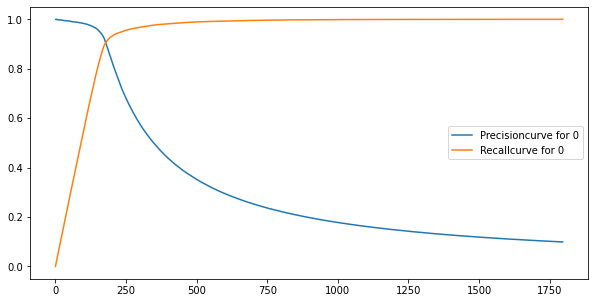

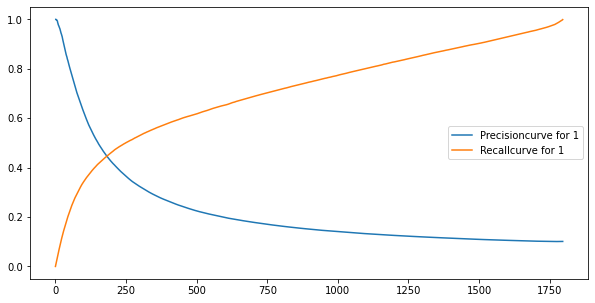

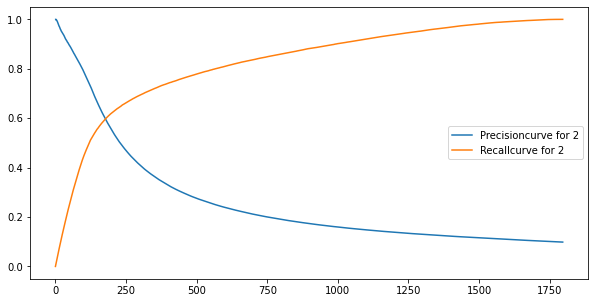

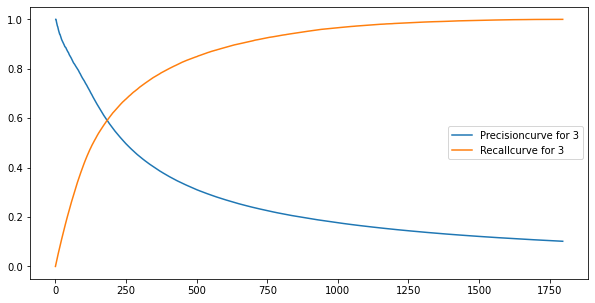

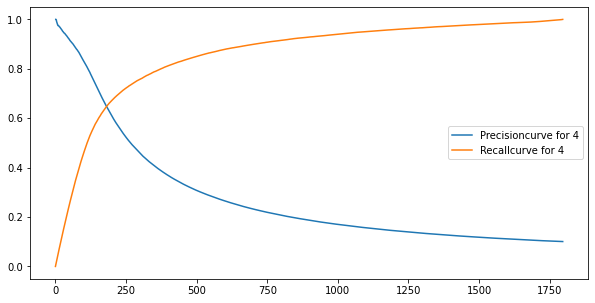

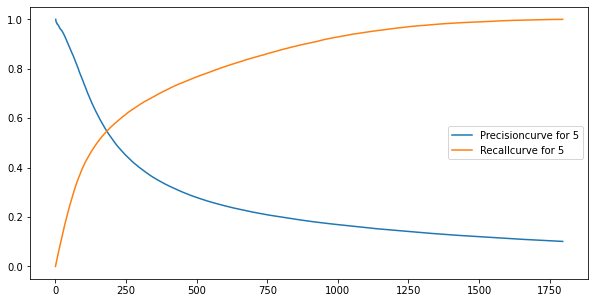

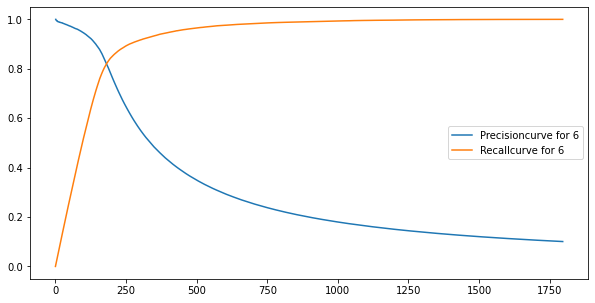

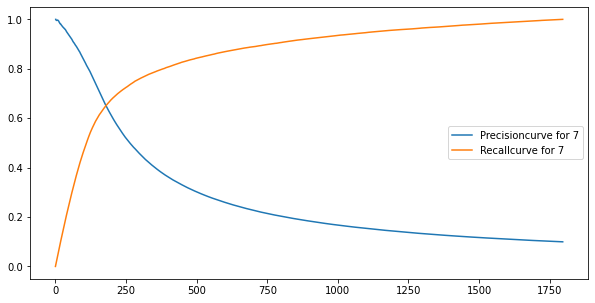

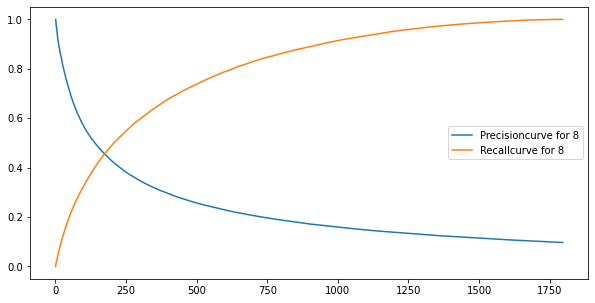

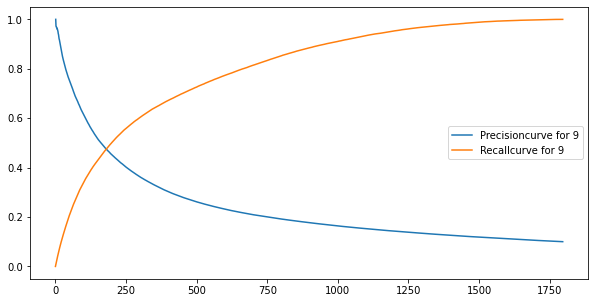

In [13]:
plotP_R_curve(Pres,Rec,target)

In [14]:
N=data.shape[0]
presGainNeg=(N/Ni-1/Pres)/(N/Ni-1)
recGainNeg=(N/Ni-1/Rec)/(N/Ni-1)
precGain=np.maximum(presGainNeg,np.zeros(presGainNeg.shape))
recGain=np.maximum(recGainNeg,np.zeros(recGainNeg.shape))

<ipython-input-14-a687c8c8d399>:3: RuntimeWarning: divide by zero encountered in true_divide
  recGainNeg=(N/Ni-1/Rec)/(N/Ni-1)


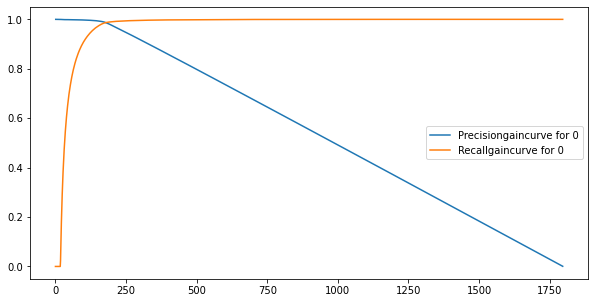

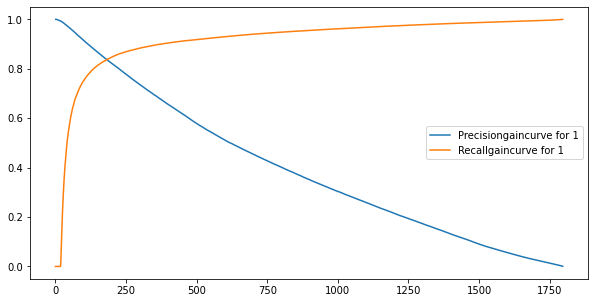

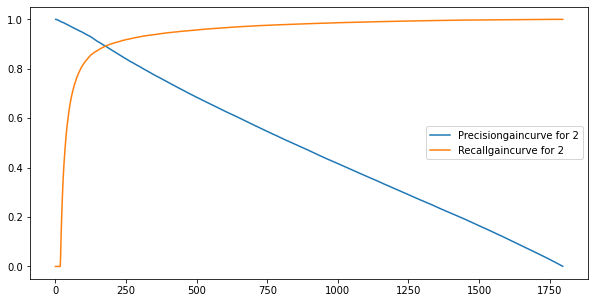

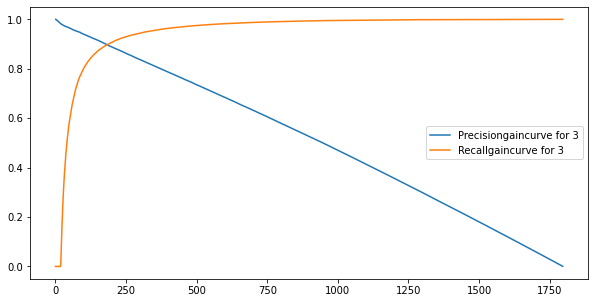

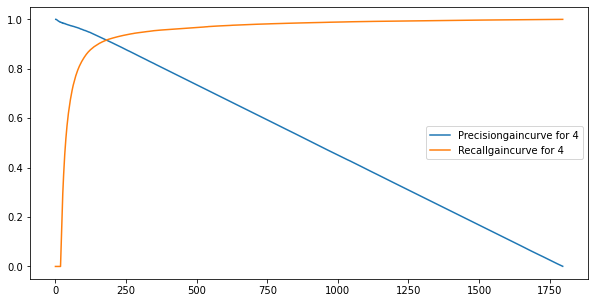

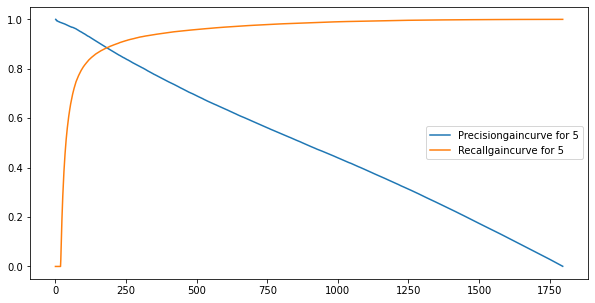

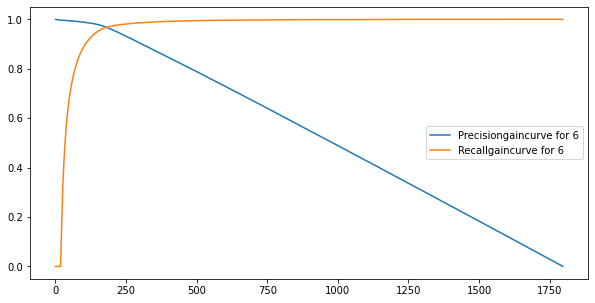

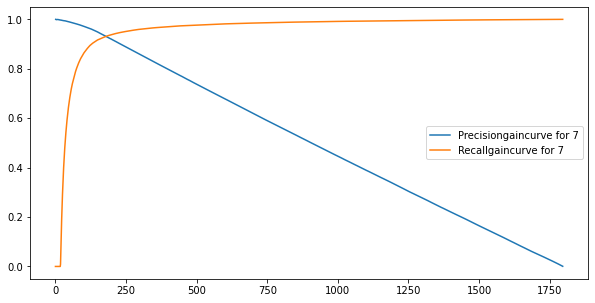

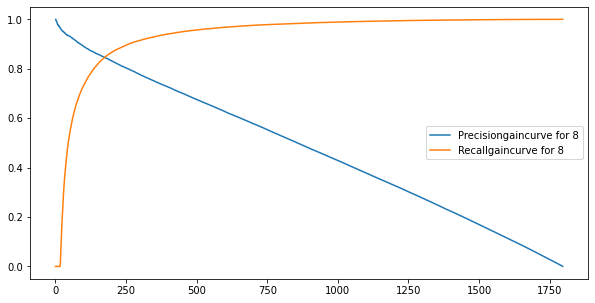

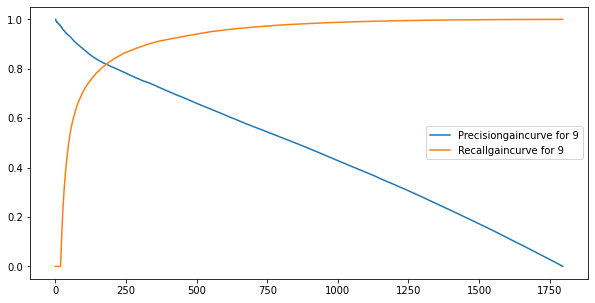

In [15]:
plotP_R_gain_curve(precGain,recGain,target)

We can see that the pricision and recall curves depend more on the observed class (the digit which is being observed) than the precision gain and recall gain curve.
Characteristic elements like the intersection of both lines (P=R) are kept in the characteristic of the Pgain and Rgain curves

## 1.2 Hand-Crafted Distance

In [17]:
# First we have to reduce the dimenstions to two
def dimred1(data):
    N=data.shape[0]
    reddata=np.zeros((N,2))
    for i in range(N):
        reddata[i][0]=np.mean(data[i][:N/2][:])
        reddata[i][1]=np.mean(data[i][N/2:][:])
    return reddata


In [ ]:
reddata1=dimred1(data)
# We now plot the scatterplot
for i in np.unique(label):
    x=reddata1[i]

# Exercise 2
## 2.1 Loading and Cleaning the Data

<div style="color: green; font-weight: bold">
The data preperation steps are in general really good.
</div>

In [1]:
#importing important modules

import pandas as pd
import os
import numpy as np
from datetime import date
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer



In [4]:
filename='CrowdstormingDataJuly1st.csv'
df = pd.read_csv(filename)
#df.iloc[:,0:25]

### Step 1: Age of Players

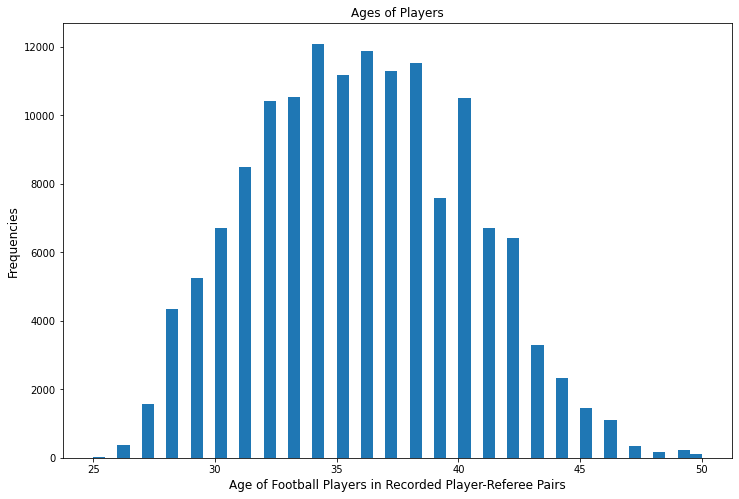

In [5]:
def calculate_age(birthday):
    birth = datetime.strptime(birthday, "%d.%m.%Y").date()
    today = date.today()
    return today.year - birth.year - ((today.month, today.day) < (birth.month, birth.day))

df['age'] = df['birthday'].apply(calculate_age)

# plotting the age frequencies

ages = df.age
plt.figure(figsize = (12,8))
plt.title('Ages of Players')
plt.xlabel('Age of Football Players in Recorded Player-Referee Pairs', fontsize = 12)
plt.ylabel('Frequencies', fontsize = 12)
plt.hist(ages,bins=max(ages),histtype = 'stepfilled')
plt.show()

### Step 2: Irrelevant Information

- We can drop the photoID information, as this is not important to our analysis. 

- Birthday can also be dropped out and replaced by age today. We can safely assume that the month, day of birth is not relevant and only the information about age might have a causally explainable effect. 

- We are only interested in red cards, so we can also drop the yellow cards feature

- We also drop the referee number, referee country and the country features. As in the second part we are interested only in the player and its features. ( It is still possible that a player has coincidentally played with a referee, who is more likely to give red cards, but without dropping these features, we were not able to move on with the further parts...)

In [6]:
df.axes[1]

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'age'],
      dtype='object')

<div style="color: green; font-weight: bold">
Whether IAT and Exp scores are irrelevant is depa
</div>

In [7]:
df = df.drop(["photoID", "birthday", "yellowCards", "refNum", "refCountry", 
              "Alpha_3", "meanIAT", "nIAT", "seIAT", "meanExp", "nExp", "seExp"],
             axis = 1)

### Step 3: Missing Information 

In [8]:
df.isna().sum()

playerShort          0
player               0
club                 0
leagueCountry        0
height             263
weight            2243
position         17726
games                0
victories            0
ties                 0
defeats              0
goals                0
yellowReds           0
redCards             0
rater1           21407
rater2           21407
age                  0
dtype: int64

We can impute the information with mean values (or other strategies), but we choose to drop the pairs, for which information is missing, as our data set is large, and there is no quite plausible strategy to impute missing information here. 

In [9]:
#dropping rows with missing info
df = df.dropna(axis = 0)
#resetting the indices
df = df.reset_index(drop=True)
#df.isna().sum()

### Step 4: Country of the League

For the county of the league we shouuld perform a one-hot-encoding.
(we have England, France, Germany, Spain)

<div style="color: green; font-weight: bold">
Using the pandas get_dummies function is a bit more straight forward but this also correct.
</div>

In [10]:
#one-hot-encoding of countries

country = np.array(df.leagueCountry)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(country)

onehot = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
onehot_encoded = onehot.fit_transform(integer_encoded)
onehot_encoded = onehot_encoded.reshape(len(onehot_encoded),4)

#print(onehot_encoded)
#print(country)

df['England'] = onehot_encoded[:,0]
df['France'] = onehot_encoded[:,1]
df['Germany'] = onehot_encoded[:,2]
df['Spain'] = onehot_encoded[:,3]

df = df.drop(["leagueCountry"], axis = 1)

### Step 5: Skin Color Ratings

We now analyse the player-referee pairs, where the skin color of the player is rated differently by the two independent raters. 

In [19]:
# we define the ratings new as the indices are shifted after data elimination
rater1_new = df.rater1
rater2_new = df.rater2

print('Number of different opinions about the skin color:',
      np.shape(np.where(rater1_new != rater2_new))[1])
print('Number of skin color ratings differing more than 0.25:',
      np.shape(np.where(np.abs(rater1_new - rater2_new)>= 0.5))[1])

Number of different opinions about the skin color: 27132
Number of skin color ratings differing more than 0.25: 164


<div style="color: green; font-weight: bold">
This is a really good approach.
</div>

The independent raters have different ratings in 27132 pairs, however their ratings differ more than 0.25 in only 164 pairs. We also drop these 164 pairs out, as the ratings are not trustworthy. Then we take the mean of the remaining ratings and use this information in the following.

In [20]:
#dropping pairs with unmatching skin color ratings
df = df.drop(np.squeeze(np.where(np.abs(rater1_new-rater2_new)>= 0.5)))
df = df.reset_index(drop=True)

#mean value of skin color ratings
rater1_new = df.rater1
rater2_new = df.rater2
rater_mean = df.rater1 + df.rater2 / 2
df["rater_mean"] = rater_mean
df = df.drop(["rater1", "rater2"], axis = 1)
df

,playerShort,player,club,height,weight,position,games,victories,ties,defeats,goals,yellowReds,redCards,age,England,France,Germany,Spain,rater_mean
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0,38,0.0,0.0,0.0,1.0,0.500
1,john-utaka,John Utaka,Montpellier HSC,179.0,82.0,Right Winger,1,0,0,1,0,0,0,40,0.0,1.0,0.0,0.0,1.125
2,aaron-hughes,Aaron Hughes,Fulham FC,182.0,71.0,Center Back,1,0,0,1,0,0,0,42,1.0,0.0,0.0,0.0,0.250
3,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,187.0,80.0,Left Fullback,1,1,0,0,0,0,0,36,1.0,0.0,0.0,0.0,0.125
4,alexander-tettey,Alexander Tettey,Norwich City,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,0,35,1.0,0.0,0.0,0.0,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115434,tom-huddlestone,Tom Huddlestone,Tottenham Hotspur,188.0,80.0,Defensive Midfielder,1,0,1,0,0,0,0,35,1.0,0.0,0.0,0.0,0.750
115435,tomas-rosicky,Tomáš Rosický,Arsenal FC,178.0,67.0,Attacking Midfielder,1,1,0,0,1,0,0,41,1.0,0.0,0.0,0.0,0.000
115436,winston-reid,Winston Reid,West Ham United,190.0,87.0,Center Back,1,0,0,1,0,0,0,33,1.0,0.0,0.0,0.0,0.500
115437,xherdan-shaqiri,Xherdan Shaqiri,Bayern München,169.0,72.0,Left Midfielder,1,1,0,0,0,0,0,30,0.0,0.0,1.0,0.0,0.375


### Step 6: One Line for each Player

In order to achieve the data form desired in the following tasks, we need to sum over all games of each player. (We are interested in the question whether a player depending only on his features, is more likely to be given a red card.)

Therefore, we need to sum over features: games, victories, ties, defeats, goals, yellowReds, redCards: Other features such as country, club,... should remain constant.

We would receive problems if a player changes club/ league country, so we should keep this in mind.


<div style="color: green; font-weight: bold">
This step goes a long way to simplify the dataset but it also destroys the dyad structure (player - referee) of the dataset.
</div>

In [21]:
player_data = df.groupby(['playerShort'])

summed_data = player_data[["games", "victories", "ties", "defeats", 
            "goals", "yellowReds", "redCards"]].sum()

#the featyres that should not be summed up 
#dropping duplicates so that a player (as long as its features e.g. club is unchanged) 
#is assigned to oa single row.

unchanged_data = df[["playerShort","club", "England", "France", "Germany", "Spain", "rater_mean","age", 
    "height", "weight", "position"]].drop_duplicates().set_index('playerShort')

#unchanged_data.join(summed_data)
resulting_data = summed_data.join((unchanged_data), on = 'playerShort')
#print(summed_data)
#print(unchanged_data)
#print(resulting_data)
resulting_data

,games,victories,ties,defeats,goals,yellowReds,redCards,club,England,France,Germany,Spain,rater_mean,age,height,weight,position
playerShort,,,,,,,,,,,,,,,,,
aaron-hughes,654,247,179,228,9,0,0,Fulham FC,1.0,0.0,0.0,0.0,0.250,42,182.0,71.0,Center Back
aaron-hunt,336,141,73,122,62,0,1,Werder Bremen,0.0,0.0,1.0,0.0,0.125,35,183.0,73.0,Attacking Midfielder
aaron-lennon,412,200,97,115,31,0,0,Tottenham Hotspur,1.0,0.0,0.0,0.0,0.375,34,165.0,63.0,Right Midfielder
aaron-ramsey,260,150,42,68,39,0,1,Arsenal FC,1.0,0.0,0.0,0.0,0.000,31,178.0,76.0,Center Midfielder
abdelhamid-el-kaoutari,124,41,40,43,1,4,2,Montpellier HSC,0.0,1.0,0.0,0.0,0.375,31,180.0,73.0,Center Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoltan-gera,392,150,96,146,71,1,1,West Bromwich Albion,1.0,0.0,0.0,0.0,0.375,42,181.0,76.0,Left Winger
zoltan-stieber,142,48,37,57,27,0,0,SpVgg Greuther Fürth,0.0,0.0,1.0,0.0,0.000,33,175.0,67.0,Left Midfielder
zoumana-camara,395,148,117,130,7,2,6,Paris Saint-Germain,0.0,1.0,0.0,0.0,1.250,42,182.0,76.0,Center Back


### Step 7: Club, playerShort, Position

These features have a large feature space (>= 12). That's why we do not perform one-hot encoding but assign categories to numbers. (We dropped the column "player", which is already reflected in playerShort.)


In [22]:
resulting_data['club'] = label_encoder.fit_transform(resulting_data['club'])
resulting_data['position'] = label_encoder.fit_transform(resulting_data['position'])
#resulting_data['playerShort'] = label_encoder.fit_transform(resulting_data[['playerShort']])
indic = label_encoder.fit_transform(resulting_data.index.values)
resulting_data.index = indic
resulting_data

,games,victories,ties,defeats,goals,yellowReds,redCards,club,England,France,Germany,Spain,rater_mean,age,height,weight,position
0,654,247,179,228,9,0,0,33,1.0,0.0,0.0,0.0,0.250,42,182.0,71.0,1
1,336,141,73,122,62,0,1,86,0.0,0.0,1.0,0.0,0.125,35,183.0,73.0,0
2,412,200,97,115,31,0,0,79,1.0,0.0,0.0,0.0,0.375,34,165.0,63.0,10
3,260,150,42,68,39,0,1,6,1.0,0.0,0.0,0.0,0.000,31,178.0,76.0,3
4,124,41,40,43,1,4,2,48,0.0,1.0,0.0,0.0,0.375,31,180.0,73.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,392,150,96,146,71,1,1,87,1.0,0.0,0.0,0.0,0.375,42,181.0,76.0,8
1413,142,48,37,57,27,0,0,73,0.0,0.0,1.0,0.0,0.000,33,175.0,67.0,7
1414,395,148,117,130,7,2,6,56,0.0,1.0,0.0,0.0,1.250,42,182.0,76.0,1
1415,47,14,15,18,0,0,2,64,0.0,0.0,0.0,1.0,0.000,37,185.0,84.0,5


Each player occurs once, which might mean that we have made a mistake. (Players could change clubs etc.)

## 2.2

We now create models and calculate the squared test errors by means of crossvalidation.


<div style="color: green; font-weight: bold">
The transformation to numpy array is not necessary and makes it a lot harder to follow because of the number of indices.
</div>

In [25]:
#target
red = (resulting_data.redCards.to_numpy() + resulting_data.yellowReds.to_numpy()) / resulting_data.games.to_numpy()
#feature array of shape #samples, #features
#exclude target from features
resdat = resulting_data.to_numpy()
features1 = resdat[:,1:5]
features2 = resdat[:,7:]
features = np.concatenate((features1,features2), axis=1)




In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

<div style="color: green; font-weight: bold">
Random forest is missing.
    
The return is one indentation too far in which means that the loop only ever runs once.
</div>

In [42]:
#Linear Regression
LiRe = LinearRegression()

#crossvalidation
def crossval_LR(X,Y,k):
    kf = KFold(n_splits=k)
    train_errors = []
    test_errors = []
    for train_index, test_index in kf.split(X):
        #train lin reg
        LiRe.fit(X[train_index],Y[train_index])
        train_error = np.square(LiRe.predict(X) - Y)/ np.shape(LiRe.predict(X))
        test_error =  np.square(LiRe.predict(X[test_index]) - Y[test_index])/ np.shape(LiRe.predict(X[test_index]))
        train_errors.append(train_error)
        test_errors.append(test_error)
        return(np.mean(train_errors),np.mean(test_errors))

In [44]:
#20 folds
crossval_LR(features,red,20)

(5.7112210923228706e-08, 1.3482415228433097e-06)

### 2.3 

<div style="color: green; font-weight: bold">
shuf_data = resdat should probably be a copy since the unshuffled version is needed for the comparisons later.
</div>

In [30]:
meanrat = resulting_data['rater_mean'].to_numpy()

shuf = []
for i in range(19):
    shuf_rat = np.random.shuffle(meanrat)
    shuf_data = resdat
    #replacing the ratings (column 13)
    shuf_data[13] = shuf_rat
    shuf.append(shuf_data)

#shuffled features
shuf = np.array(shuf)
shuf_feat1 = shuf[:,:,1:5]
shuf_feat2 = shuf[:,:,7:]
shuf_feat = np.concatenate((shuf_feat1,shuf_feat2),axis = 2)
#target stays the same:
shuf_red = np.broadcast_to(red,(19,1417))
print(np.shape(shuf_feat))
#print(np.sum(shuf_feat == np.NaN))

(19, 1417, 14)


<div style="color: green; font-weight: bold">
we could also not find the reason for why the predict function raises a value error <br/>
    
ValueError: Input contains NaN, infinity or a value too large for dtype('float64')
    
but looking for NaNs or infinity values in the data brings up nothing.
</div>

does not work...

In [31]:
cvs = []
for i in range(19):
    cv = crossval_LR(shuf_feat[i],shuf_red[i],20)
    cvs.append(cv)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').